In [51]:
#! pip install pandas numpy matplotlib yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')

In [3]:
#### Bucle por los distintos valores de SMA para ver el que mejor rendimientos da

initial_capital = 100000.0
date_start = '2016-01-01'
date_end = '2024-05-19'

symbol = 'BTC-USD'
data = yf.download(symbol, start=date_start, end=date_end, interval='1d')
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'price_usd'}, inplace=True)

sma_max = 0
sma_name = 0

for sma in range (10, 400, 5):

    data['SMA'] = data['price_usd'].rolling(window=sma, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'][sma:] =  np.where(data['price_usd'][sma:] > data['SMA'][sma:], 1, 0)
    data['Position'] = data['Signal'].diff()

    # Create a DataFrame to store the positions
    positions = pd.DataFrame(index=data.index).fillna(0)
    positions[symbol] = 100 * data['Signal']  # This example assumes you buy 100 shares

    # Calculate the daily portfolio value
    portfolio = positions.multiply(data['price_usd'], axis=0)

    # Store the cash in the portfolio
    pos_diff = positions.diff()
    portfolio['cash'] = initial_capital - (pos_diff.multiply(data['price_usd'], axis=0)).sum(axis=1).cumsum()

    # Total portfolio value
    portfolio['total'] = portfolio[symbol] + portfolio['cash']

    # Calculate the portfolio returns
    portfolio['returns'] = portfolio['total'].pct_change()

    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio['returns']).cumprod() - 1

    # Print final portfolio value
    final_value = portfolio['total'].iloc[-1]
    ret = (final_value - initial_capital) / initial_capital
    
    if ret > sma_max :
        sma_max = ret
        sma_name = sma
    
    #print(f"SMA" + str(sma))
    #print(f"Final Portfolio Value: ${final_value:.2f}")
    #print(f"Total Return: {(final_value - initial_capital) / initial_capital:.2%}")
    #print(f"Total Return: {ret:.2%}")
    #print("")

print(f"Date start:\t " + date_start)
print(f"Date end:\t " + date_end)
print(f"The best SMA " + str(sma_name))
print(f"Total return: {sma_max:.2%}")

[*********************100%***********************]  1 of 1 completed
Date start:	 2016-01-01
Date end:	 2024-05-19
The best SMA 110
Total return: 10583.19%


In [6]:
short_window = 40

data['SMA40'] = data['price_usd'].rolling(window=short_window, min_periods=1).mean()
data['Signal'] = 0
data['Signal'][short_window:] =  np.where(data['price_usd'][short_window:] > data['SMA40'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

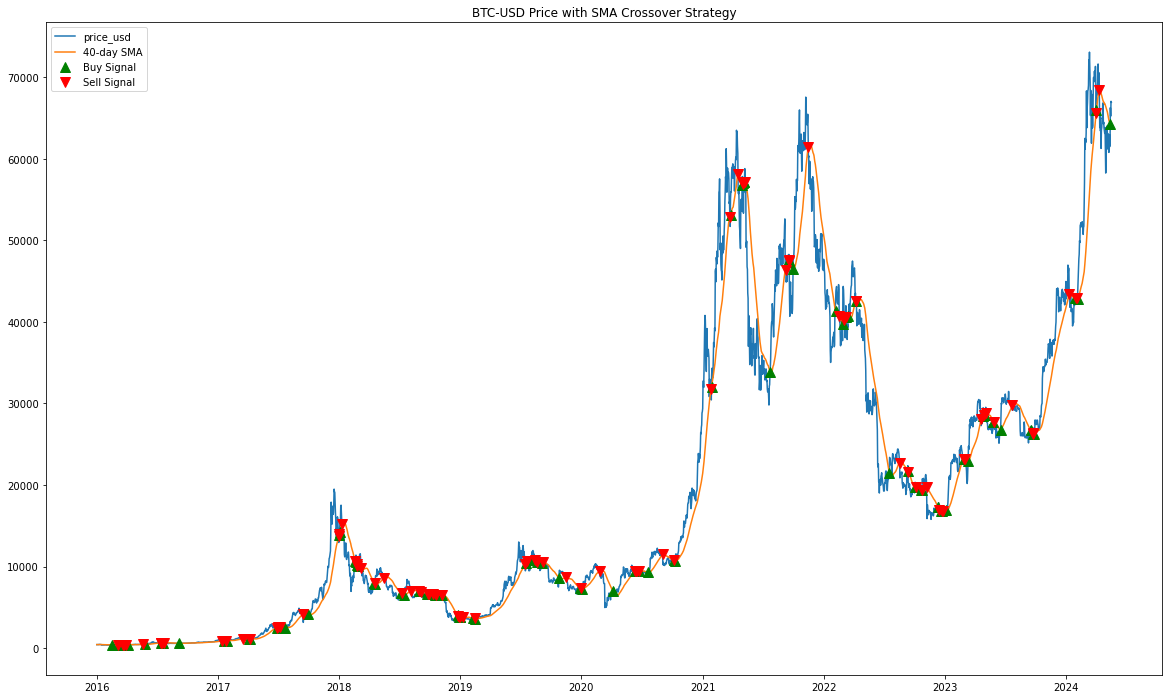

In [7]:
# Initial capital
initial_capital = 100000.0

# Create a DataFrame to store the positions
positions = pd.DataFrame(index=data.index).fillna(0)
positions[symbol] = 100 * data['Signal']  # This example assumes you buy 100 shares

# Calculate the daily portfolio value
portfolio = positions.multiply(data['price_usd'], axis=0)

# Store the cash in the portfolio
pos_diff = positions.diff()
portfolio['cash'] = initial_capital - (pos_diff.multiply(data['price_usd'], axis=0)).sum(axis=1).cumsum()

# Total portfolio value
portfolio['total'] = portfolio[symbol] + portfolio['cash']

# Calculate the portfolio returns
portfolio['returns'] = portfolio['total'].pct_change()

# Plot the strategy
plt.figure(figsize=(20, 12))
plt.plot(data['price_usd'], label='price_usd')
plt.plot(data['SMA40'], label='40-day SMA')
#plt.plot(data['SMA200'], label='200-day SMA')

# Buy signals
plt.plot(data[data['Position'] == 1].index, 
         data['SMA40'][data['Position'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Sell signals
plt.plot(data[data['Position'] == -1].index, 
         data['SMA40'][data['Position'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{symbol} Price with SMA Crossover Strategy')
plt.legend(loc='best')
plt.show()

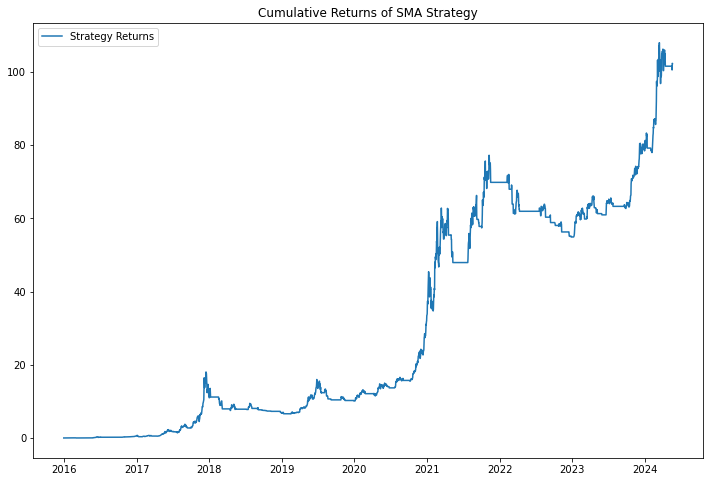

Final Portfolio Value: $10326714.16
Total Return: 10226.71%


In [8]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio['returns']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Strategy Returns')
plt.title('Cumulative Returns of SMA Strategy')
plt.legend(loc='best')
plt.show()

# Print final portfolio value
final_value = portfolio['total'].iloc[-1]
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {(final_value - initial_capital) / initial_capital:.2%}")

[*********************100%***********************]  1 of 1 completed
Date start:	 2016-01-01
Date end:	 2024-05-19
The best SMA 40
Total return: 10226.71%
